## 외부의 파이스파크 불러오기

In [1]:
import findspark
findspark.init()

import pyspark
findspark.find()

'C:\\spark\\spark-2.4.4-bin-hadoop2.7'

In [2]:
sc = None

# 1. Spark application 실행 과정

Spark application : 클러스터에서 독립된 프로세스들의 묶음으로 동작하며, 메인 프로그램(driver Program)의 SparkContext object에 의해서 조정된다.
 - 1. Driver Program(프로세스)가 main을 실행시키며 SparkContext 생성한다.
 - 2. SparkContext가 Cluster Manager에 연결된다.
 - 3. 연결되면, 클러스터 내의 Executor를 할당받는다.
 - 4. SparkContext가 application code(SparkContext에 전달된 Jar 또는 Python file)를 executor에 보낸다.
 - 5. SparkContext가 실행할 task를 executor에 보낸다.
         => 요약 : SparkContext가 클러스터 매니저에 연결해서 자원(executor) 할당받고, 할당받은 자원에 사용할 라이브러리 보내고, 실행할 task를 넘긴다.

In [9]:
## 필요한 라이브러리를 불러옵니다. 
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
## pyspark를 불러옵니다.
from pyspark import SparkContext

## 이미 spark context가 살아 있으면 죽이고, 있으면 그대로 사용합니다. 
## spark context는 한 번에 여러 개 돌리려면 세팅에 몇 개를 추가해야 하는것 같아요. 
## 또한 스파크 컨텍스트를 제대로 구현하려면 여기에 넘겨야 하는 값들이 많이 있습니다만, 저는 테스트만 하려고 해서 이걸 대충 세팅했습니다. 
if sc is None: 
    sc = SparkContext(master="local", appName="first app")
else:
    sc.stop()
    sc = SparkContext(master="local", appName="first app")

In [10]:
sc

<SparkContext master=local appName=first app>

In [5]:
## 이미 spark context가 살아 있으면 죽이고, 있으면 그대로 사용합니다. 
## spark context는 한 번에 여러 개 돌리려면 세팅에 몇 개를 추가해야 하는것 같아요. 
## 또한 스파크 컨텍스트를 제대로 구현하려면 여기에 넘겨야 하는 값들이 많이 있습니다만, 저는 테스트만 하려고 해서 이걸 대충 세팅했습니다. 
if sc is None: 
    sc = SparkContext(master="local", appName="first app")
else:
    sc.stop()
    sc = SparkContext(master="local", appName="first app")

In [6]:
sc

<SparkContext master=local appName=first app>

In [13]:
### peformance check 
spark_time_lst = []
python_time_lst = []
python_np_time_lst = []
n_lst = [20000*i for i in range(0, 10)]

In [16]:
for n in n_lst:
    def each_k(k):
        return 1//(16**k)*( 4//(8*k+1) - 2//(8*k+4) - 1//(8*k+5) - 1//(8*k+6))
    
    ## pure python
    start_time = time.time()
    pi_approximated = sum((each_k(k) for k in range(0, n)))
    python_time_lst.append(time.time()-start_time)
    
    print(" ============= %d ==================" % (n))


 ============= 0 ==================
 ============= 20000 ==================
 ============= 40000 ==================
 ============= 60000 ==================
 ============= 80000 ==================
 ============= 100000 ==================
 ============= 120000 ==================
 ============= 140000 ==================
 ============= 160000 ==================
 ============= 180000 ==================


In [17]:


for n in n_lst:
    def each_k(k):
        return 1//(16**k)*( 4//(8*k+1) - 2//(8*k+4) - 1//(8*k+5) - 1//(8*k+6))
    

    ## with numpy 
    start_time = time.time()
    pi_approximated = np.apply_along_axis(arr=np.array(range(0, 10)), func1d=each_k, axis=0).sum()
    python_np_time_lst.append(time.time() - start_time)
    
    print(" ============= %d ==================" % (n))



 ============= 0 ==================
 ============= 20000 ==================
 ============= 40000 ==================
 ============= 60000 ==================
 ============= 80000 ==================
 ============= 100000 ==================
 ============= 120000 ==================
 ============= 140000 ==================
 ============= 160000 ==================
 ============= 180000 ==================


C:\Users\dahlmoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in floor_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:

for n in n_lst:
    def each_k(k):
        return 1//(16**k)*( 4//(8*k+1) - 2//(8*k+4) - 1//(8*k+5) - 1//(8*k+6))
    
    
    ## with spark 
    start_time = time.time()
    pi_approximated = sc.parallelize(range(0, n)).map(each_k).sum()
    spark_time_lst.append(time.time()-start_time)
    print(" ============= %d ==================" % (n))


 ============= 0 ==================
 ============= 20000 ==================
 ============= 40000 ==================
 ============= 60000 ==================
 ============= 80000 ==================
 ============= 100000 ==================
 ============= 120000 ==================
 ============= 140000 ==================
 ============= 160000 ==================
 ============= 180000 ==================


In [23]:
spark_time_lst

[0.7266221046447754,
 1.9028818607330322,
 6.522260665893555,
 14.782626390457153,
 26.35537815093994,
 41.08754086494446,
 61.39430904388428,
 83.82082414627075,
 108.2252094745636,
 136.98884224891663]

In [24]:
python_time_lst

[0.0,
 1.4216716289520264,
 6.0897979736328125,
 14.340341329574585,
 0.0,
 1.4272282123565674,
 6.116169214248657,
 14.346246242523193,
 25.580539226531982,
 0.0,
 1.4282145500183105,
 6.084844350814819,
 14.361341714859009,
 25.569794178009033,
 40.34349036216736,
 60.041353702545166,
 83.73701429367065,
 106.88193964958191,
 135.73500180244446]

In [25]:
python_np_time_lst

[0.0009975433349609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [20]:
%matplotlib inline

No handles with labels found to put in legend.


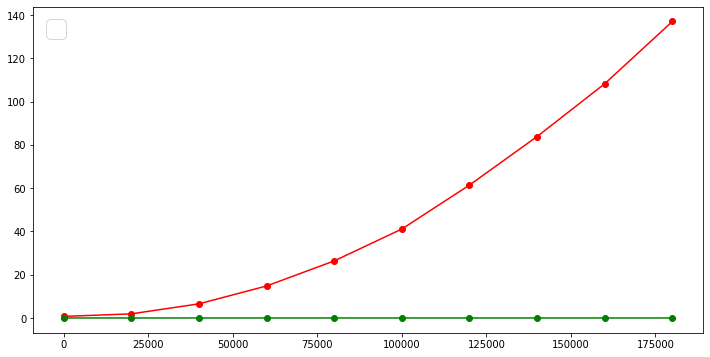

In [28]:
### plotting     
df = pd.DataFrame({
    "spark":spark_time_lst.copy(), 
    #"pure python":python_time_lst.copy(), 
    "python with numpy":python_np_time_lst.copy()
}, index = [20000*i for i in range(0, 10)])
plt.figure(figsize=(12, 6))
plt.plot(df['spark'], 'ro-'), plt.plot(df['python with numpy'], 'go-') #, plt.plot(df['pure python'], 'bo-'),
plt.legend(fontsize=25)
#plt.xticks([20000*i for i in range(0, 10)], [20000*i for i in range(0, 10)])

plt.show()